# Time series visualization

This script is designed to load in the time series generated in gee_landsat_extract or gee_sentinel_extractand plot them out in ways that makes them easy to compare

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [73]:
# get the names of all files starting with a certain string in ../../data/EVI
site = "Xai-Xai"
sensor = "landsat"

names = [f for f in os.listdir(f"../../data/GEE/{sensor}_ts/") if f.startswith(site)]

dataframes = []

for name in names:
    df = pd.read_csv(f"../../data/GEE/{sensor}_ts/{name}")
    df['ID'] = name.split(", ")[2]
    dataframes.append(df)

ts = pd.concat(dataframes)

ts.columns


Index(['longitude', 'latitude', 'date', 'EVI', 'NDVI', 'NDWI', 'TIR', 'Cloudy',
       'year', 'month', 'day', 'time', 'site', 'landcover', 'ID'],
      dtype='object')

In [74]:
# Convert 'date' to datetime if it's not already
ts['date'] = pd.to_datetime(ts['date'])

# Filter for clear observations
ts = ts[ts['Cloudy'] == 0]

# Filter for EVI values not between -1 and 1
# ts = ts[(ts['EVI'] > -1) & (ts['EVI'] < 1)]

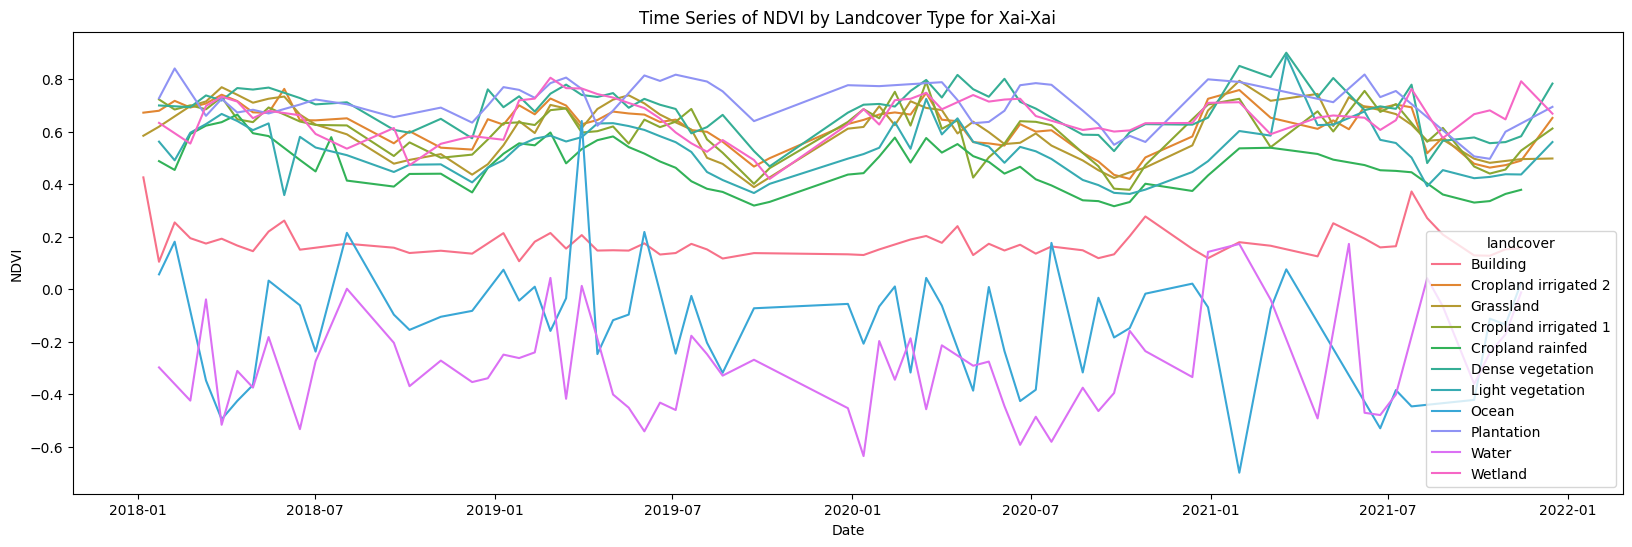

In [75]:
# Plot the time series with 'year' as x-axis
metric = 'NDVI'

# Set the plot size
plt.figure(figsize=(20, 6))

# Create the line plot with confidence intervals
sns.lineplot(data=ts.groupby(['date', 'landcover'])[metric].mean().reset_index(), 
             x='date', y=metric, hue='landcover')

# Add labels and title
plt.xlabel('Date')
plt.ylabel(metric)
plt.title(f'Time Series of {metric} by Landcover Type for {site}')

# Show the plot
plt.show()

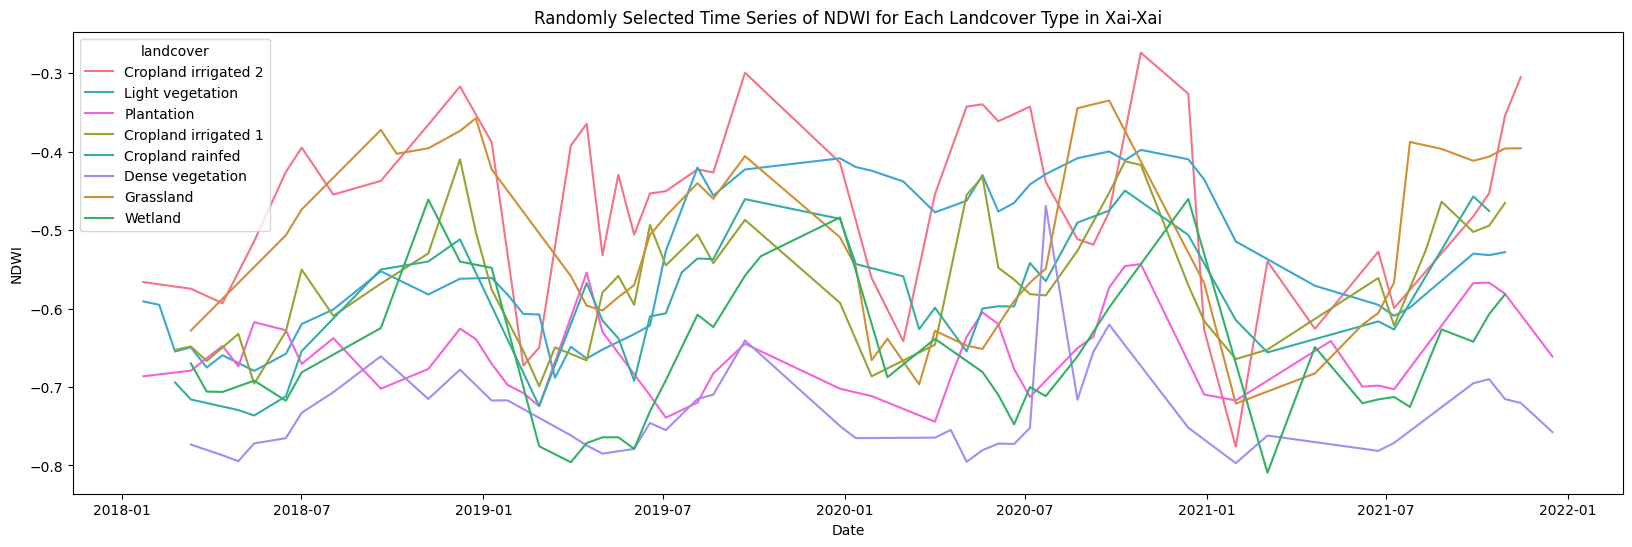

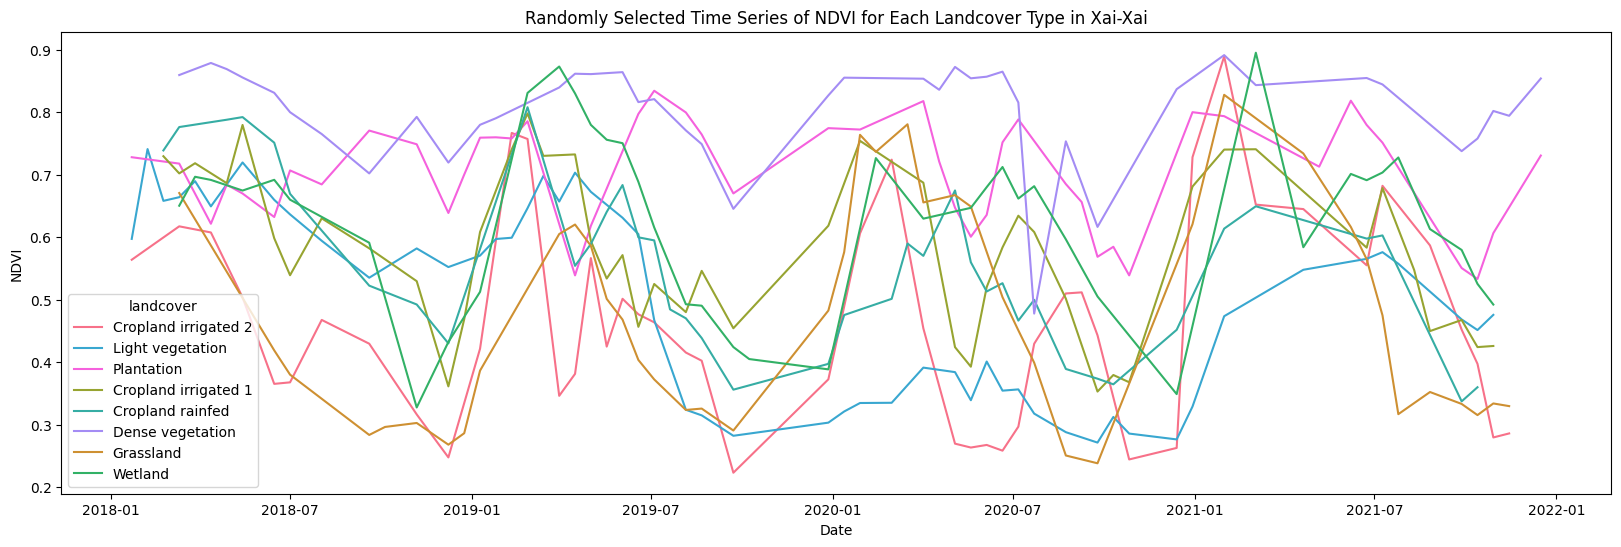

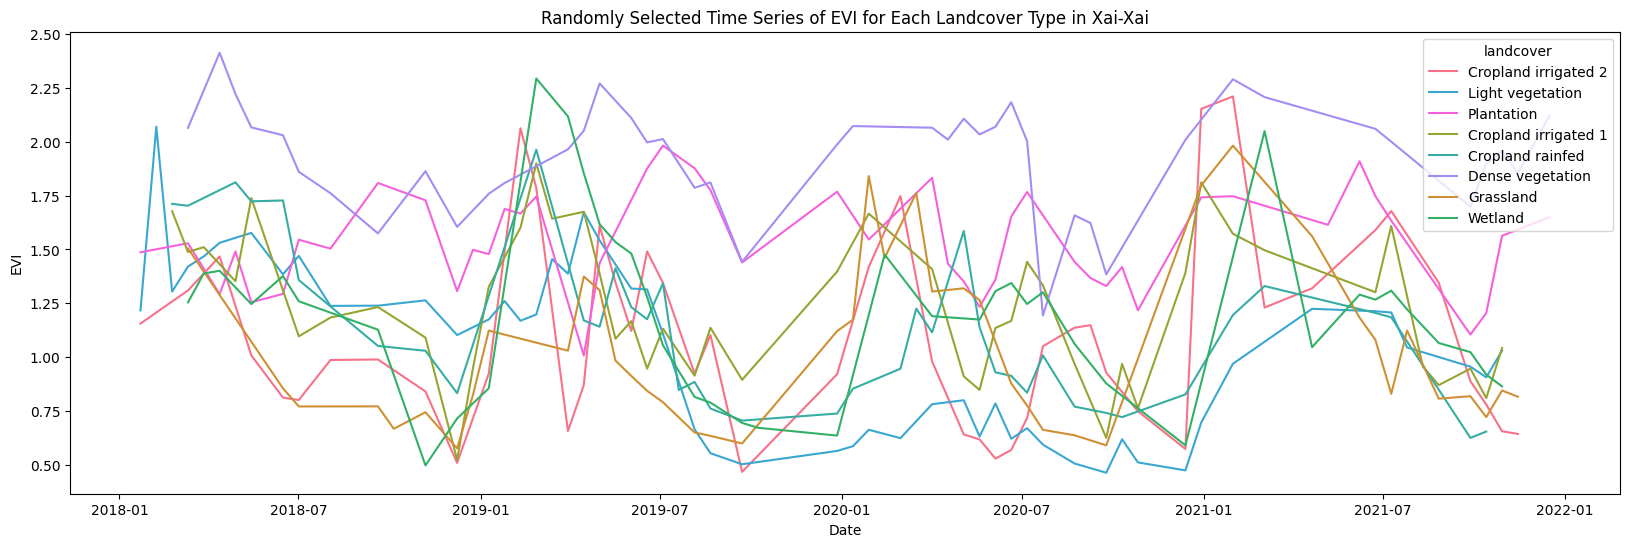

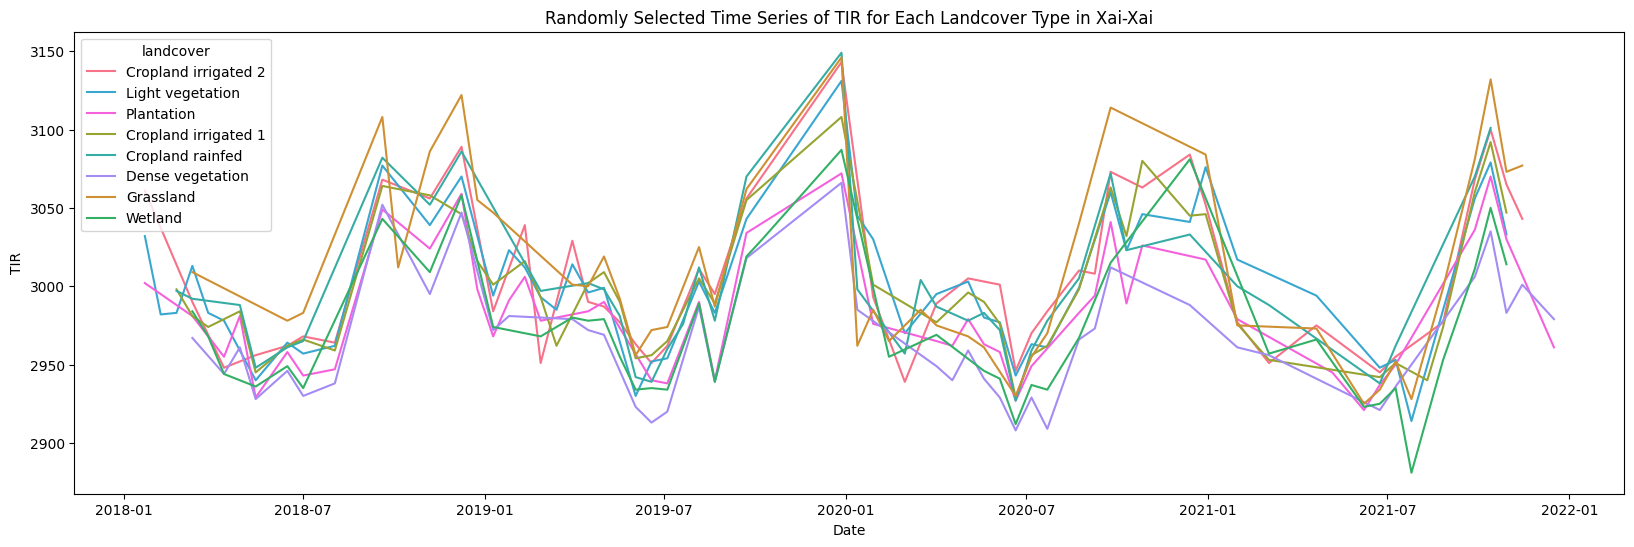

In [80]:
# pick examples for each landcover and plot that out
unique_landcovers = ts['landcover'].unique()

# remove water, ocean, and building because these are too easy to spot and they throw off the distribution
unique_landcovers = [x for x in unique_landcovers if x not in ['Water', 'Ocean', 'Building']]

selected_examples = pd.DataFrame()

for landcover in unique_landcovers:
    # Randomly select one lat/lon ID from each landcover
    subset = ts[ts['landcover'] == landcover]
    selected_id = np.random.choice(subset['ID'].unique(), 1)[0]
    selected_example = subset[subset['ID'] == selected_id]
    selected_examples = pd.concat([selected_examples, selected_example])

# If you want to smooth -- Calculate the rolling average of NDVI
# selected_examples[metric] = selected_examples.groupby('ID')[metric].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Create a color palette with the same number of colors as there are unique landcovers
palette = sns.color_palette("husl", len(unique_landcovers))
landcover_color_map = dict(zip(unique_landcovers, palette))

# Step 4: Plotting
metrics = ['NDWI', 'NDVI', 'EVI', 'TIR']

for metric in metrics:
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=selected_examples.groupby(['date', 'landcover'])[metric].mean().reset_index(), 
                x='date', y=metric, hue='landcover', palette=landcover_color_map)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'Randomly Selected Time Series of {metric} for Each Landcover Type in {site}')

    # Show the plot
    plt.show()


In [239]:
# save the csv so that I can get ChatGPT to look at it
# ts.to_csv(f"../../data/test.csv", index=False)